In [1]:
%matplotlib inline

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
N = 100

X, y = make_regression(n_samples=N*2, n_features=1, noise=20, random_state=2022)
order = np.argsort(y)
X = X[order]
y = y[order]

X_train = X[:N]
X_test = X[N:]
y_train = y[:N]
y_test = y[N:]

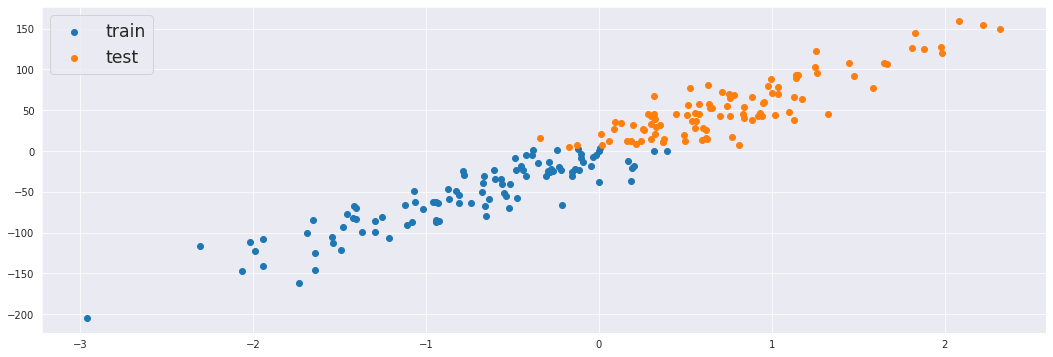

In [3]:
def plot_data():
    plt.figure(figsize=(18, 6))
    plt.scatter(X_train, y_train, label="train")
    plt.scatter(X_test, y_test, label="test")
    plt.legend(fontsize="xx-large")

def plot_model(model, color=None):
    line = np.linspace(X.min(), X.max(), 1_000).reshape(-1, 1)
    prediction = model.predict(line)
    plt.plot(line, prediction, color=color)
    
plot_data()

# Exercise 1

### fit a decision tree regressor into the data and plot the results

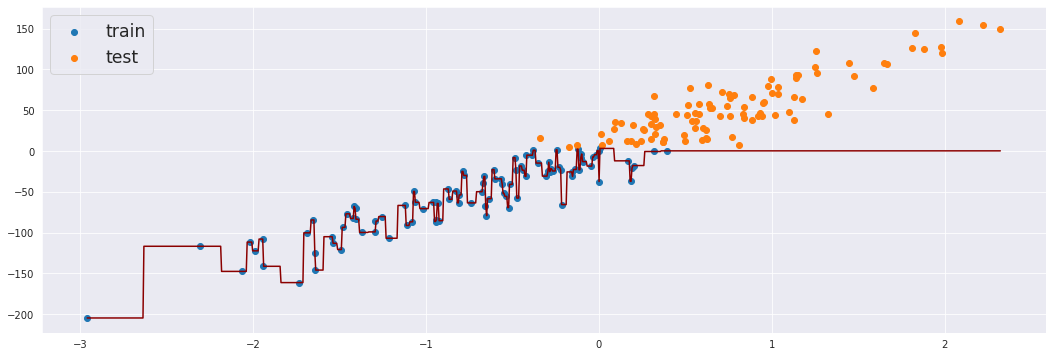

In [4]:
tree_model = DecisionTreeRegressor().fit(X_train, y_train)

plot_data()
plot_model(tree_model, "darkred")

# Exercise 2

### fit a linear regression model into the data and plot the results

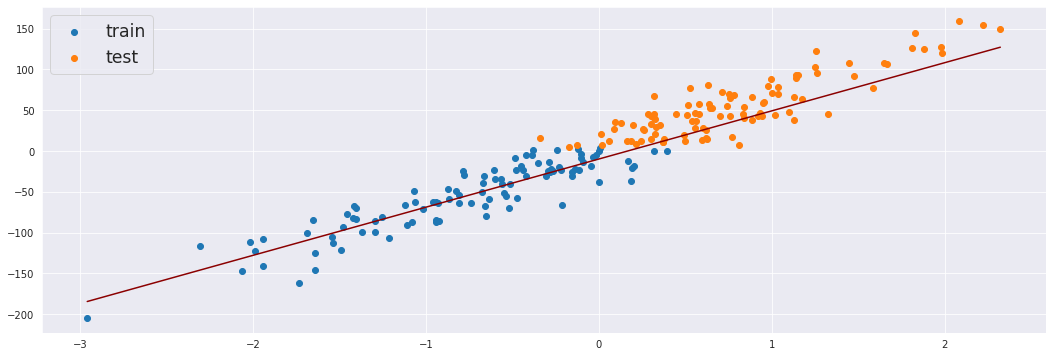

In [5]:
linear_model = LinearRegression().fit(X_train, y_train)

plot_data()
plot_model(linear_model, "darkred")

# Exercise 3

### compare the performance of the two models on the train data and the test data

# Exercise 4

### plot the true test values of y against the predicted values for y

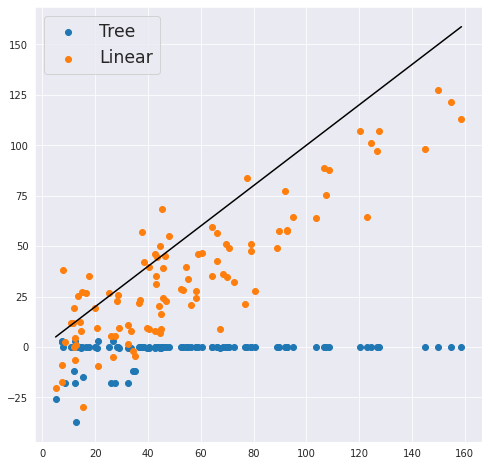

In [6]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, tree_model.predict(X_test), label="Tree")
plt.scatter(y_test, linear_model.predict(X_test), label="Linear")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="black")
plt.legend(fontsize="xx-large");

# Exercise 5

### is there a better way to quantify the quality of the model?

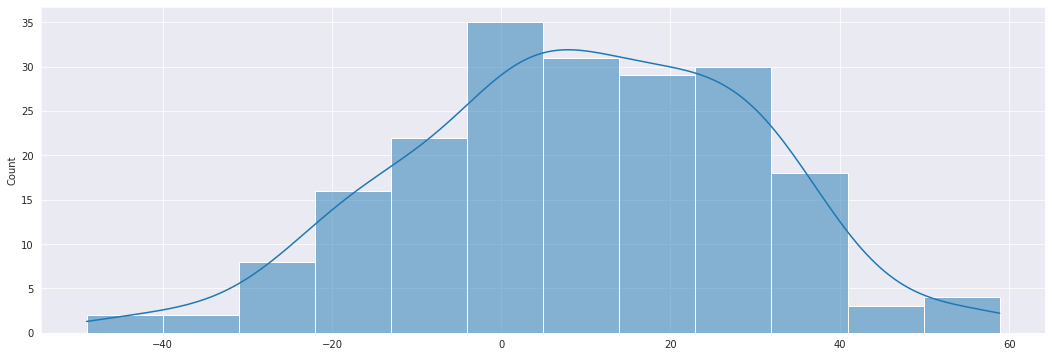

In [7]:
plt.figure(figsize=(18, 6))
sns.histplot(y - linear_model.predict(X), kde=True);